# Business Understanding 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [150]:
#Import Libraries
#load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pylab 
import scipy.stats as stats
import seaborn as sns
plt.style.use('fivethirtyeight')
from IPython.display import Image, display
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [151]:
# magic command to ensure every line is displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [152]:
# Load the Titanic dataset's data files
df = pd.read_csv('Assignment 1_Titanic dataset.csv')


# Exploratory Data Analysis (EDA)

In [153]:
# Understanding the Survival Ratio
df.survived.value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [154]:
df2 = pd.read_csv('Assignment 1_Titanic dataset.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [155]:
# Gender survived
pd.crosstab(df['sex'],df['survived'])

survived,0.0,1.0
sex,,
female,127,339
male,682,161


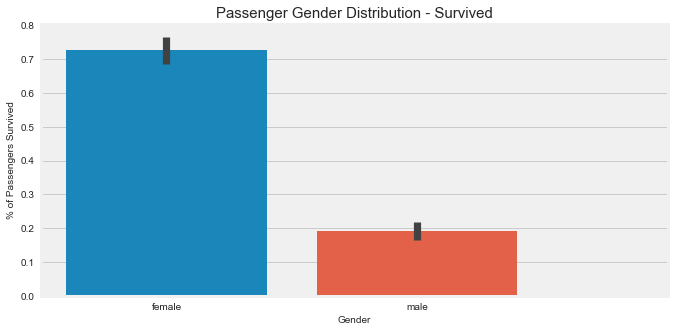

In [156]:
# Gender distribution bargraph
plt.subplots(figsize = (10,5))
sns.barplot(x = "sex", 
            y = "survived", 
            data=df, 
            linewidth=2)
plt.title("Passenger Gender Distribution - Survived", fontsize = 15)
plt.xlabel("Gender", fontsize = 10);
plt.ylabel("% of Passengers Survived", fontsize = 10);
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val);

Pclass and Survived

In [157]:
pd.crosstab(df['pclass'],df['survived'])

survived,0.0,1.0
pclass,,
1.0,123,200
2.0,158,119
3.0,528,181


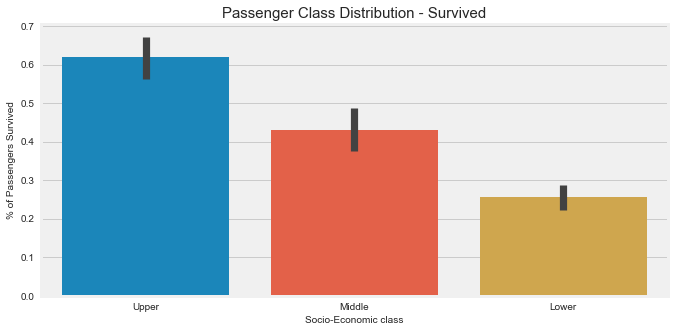

In [158]:
# Bargraph showing distriution of survivied people based on pclass
plt.subplots(figsize = (10,5))
sns.barplot(x = "pclass", 
            y = "survived", 
            data=df, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived", fontsize = 15)
plt.xlabel("Socio-Economic class", fontsize = 10);
plt.ylabel("% of Passengers Survived", fontsize = 10);
labels = ['Upper', 'Middle', 'Lower']
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

Embarked and Survived

In [159]:
pd.crosstab(df['embarked'],df['survived'])

survived,0.0,1.0
embarked,,
C,120,150
Q,79,44
S,610,304


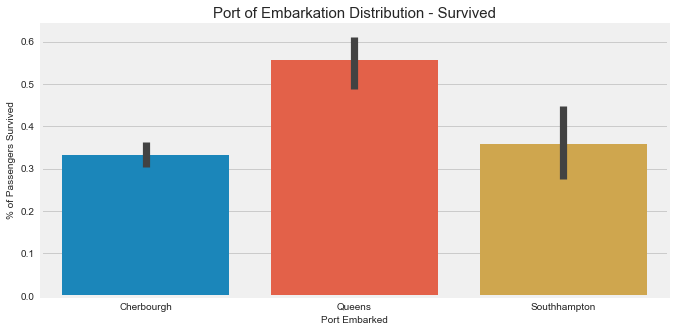

In [160]:
# Bargraph showing distriution of survivied people based on embarked
plt.subplots(figsize = (10,5))
sns.barplot(x = "embarked", 
            y = "survived",
            data=df, 
            linewidth=2)
plt.title("Port of Embarkation Distribution - Survived", fontsize = 15)
plt.xlabel("Port Embarked", fontsize = 10);
plt.ylabel("% of Passengers Survived", fontsize = 10);
labels = ['Cherbourgh', 'Queens', 'Southhampton']
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

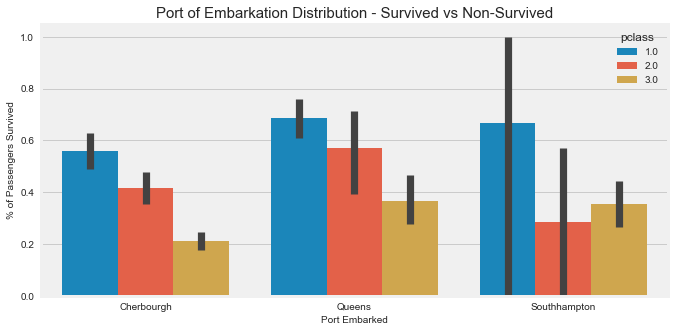

In [161]:
# Passenger class vs embarked bar graph
plt.subplots(figsize = (10,5))
sns.barplot(x = "embarked", 
            y = "survived",
            hue = "pclass",
            data=df, 
            linewidth=2)
plt.title("Port of Embarkation Distribution - Survived vs Non-Survived", fontsize = 15)
plt.xlabel("Port Embarked", fontsize = 10);
plt.ylabel("% of Passengers Survived", fontsize = 10);
labels = ['Cherbourgh', 'Queens', 'Southhampton']
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

Age and Survived

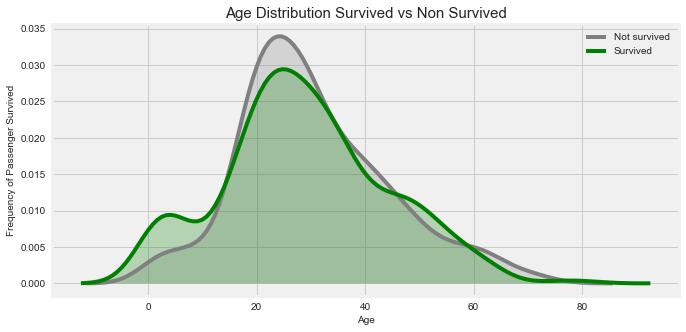

In [162]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,5),)

ax=sns.kdeplot(df.age[df.survived == 0] , 
               color='gray',
               shade=True,
               label='Not survived')
ax=sns.kdeplot(df.age[(df.survived == 1)] , 
               color='g',
               shade=True, 
               label='Survived')
## Adding Titles
plt.title('Age Distribution Survived vs Non Survived', fontsize = 15)
plt.ylabel("Frequency of Passenger Survived", fontsize = 10)
plt.xlabel("Age", fontsize = 10)

Correlation Analysis

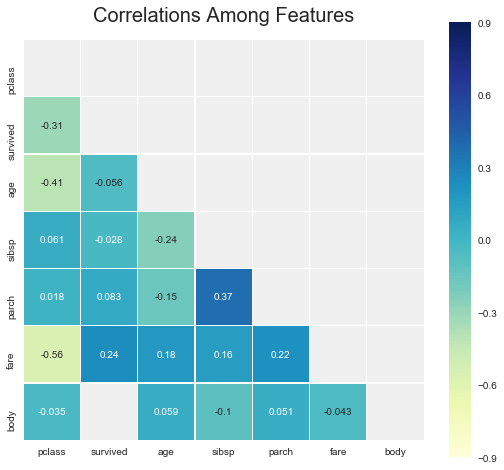

In [163]:
# heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'YlGnBu',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

# Positive Correlation Features

Fare and Survived: 0.24

Parch and sibsp : 0.37


# EDA Summary :
Overall 500 (~38%) passengers survived while 809 (~62%) perished

Females 339 (~74%) survived and 127 (~26%) perished, while Males 161 (~19%) survived and 682 perished

There is a significant difference in survival rates of females and males , substantiating the Hypothesis that Females had a higher chance of survival than Males

~ 63% 1st Class , ~ 48% 2nd Class & ~ 24% 3rd Class Passengers Survived. Class is definitely a Factor for Survival

There is a significant difference in Survival rates by Passenger Class.A higher % of Females survived across Passenger classes than Males , substantiating the Hypothesis that Class is a definitive factor influencing Survival

A large portion of passengers who bought the ticket within 50 Pound range range did not survive, substantiating the Hypothesis that Fare is likely a contributor for Survival

Infants and younger passengers between 20-40 years had a higher Survival rate , substantiating the Hypothesis that Age is likely a contributor for Survival

# Missing Value Identification and Treatment

In [164]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
pclass,float64,3,1,0.08,1309
survived,float64,2,1,0.08,1309
name,object,1307,1,0.08,1309
sex,object,2,1,0.08,1309
age,float64,98,264,20.15,1046
sibsp,float64,7,1,0.08,1309
parch,float64,8,1,0.08,1309
ticket,object,929,1,0.08,1309
fare,float64,281,2,0.15,1308
cabin,object,186,1015,77.48,295


In [165]:
# Impute Embarked Missing Values with Mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [166]:
# Fill missing fare values with "Median of Fare"
# Convert Fare missing data from "NAN: Not a Number" to Float
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
# Now Fill the Missing Values with Median
df["fare"] = df["fare"].fillna(value=df["fare"].median())

In [167]:
# Imputer missing age data with median value
# Convert Age missing data from "NAN: Not a Number" to Float
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# Now Fill the Missing Values with Median
df["age"] = df["age"].fillna(value=df["age"].median())

In [168]:
# Drop non-significant columns from the data set
df = df.drop(labels=['boat', 'body', 'home.dest', 'cabin' , 'ticket' , 'name'], axis = 1)

Outlier Aalysis

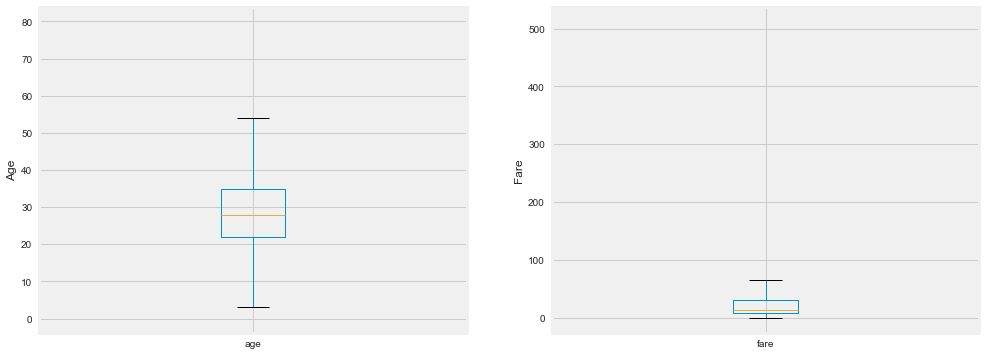

In [169]:
# Draw boxplots to visualise outliers in the continuous variables 

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = df.boxplot(column='fare')
fig.set_title('')
fig.set_ylabel('Fare')

In [170]:
# Age Outliers
# let's visualise median and quantiles
# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

df.age.describe()

count    1310.000000
mean       29.502036
std        12.900383
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

In [171]:
# Let's calculate the boundaries outside which sit the outliers assuming Age follows a Gaussian distribution

Upper_bound_age = df.age.mean() + 3* df.age.std()
Lower_bound_age = df.age.mean() - 3* df.age.std()

Upper_bound_age, Lower_bound_age

(68.20318399836239, -9.199112700652464)

The upper boundary for Age is 68-69 years.

The lower boundary is meaningless as there can't be negative age.

This value could be generated due to the lack of normality of the data.

We will proceed with Upper Bound for Age as 68 and Cap it with "Top Coding"

In [172]:
df[df.age>68]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
9,1.0,0.0,male,71.0,0.0,0.0,49.5042,C
14,1.0,1.0,male,80.0,0.0,0.0,30.0000,S
61,1.0,1.0,female,76.0,1.0,0.0,78.8500,S
81,1.0,0.0,male,70.0,1.0,1.0,71.0000,S
135,1.0,0.0,male,71.0,0.0,0.0,34.6542,C
506,2.0,0.0,male,70.0,0.0,0.0,10.5000,S
727,3.0,0.0,male,70.5,0.0,0.0,7.7500,Q
1235,3.0,0.0,male,74.0,0.0,0.0,7.7750,S


In [173]:
# Fare Outliers
# let's look at the values of the quantiles so we can calculate the upper and lower boundaries for the outliers
# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

df.fare.describe()

count    1310.000000
mean       33.266714
std        51.724348
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [174]:
# Let's calculate the upper and lower boundaries to identify outliers according to interquantile proximity rule

IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)

Lower_fence_fare = df.fare.quantile(0.25) - (IQR * 1.5)
Upper_fence_fare = df.fare.quantile(0.75) + (IQR * 1.5)

Upper_fence_fare, Lower_fence_fare, IQR

(66.34379999999999, -27.172999999999995, 23.379199999999997)

The upper boundary for Fare is 101 Pounds. We will proceed with Upper Boundary for Fare as 101 Pounds and Cap it with "Top Coding"

In [175]:
df[df.fare>101]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
10,1.0,0.0,male,47.0000,1.0,0.0,227.5250,C
11,1.0,1.0,female,18.0000,1.0,0.0,227.5250,C
16,1.0,0.0,male,24.0000,0.0,1.0,247.5208,C
17,1.0,1.0,female,50.0000,0.0,1.0,247.5208,C
23,1.0,1.0,female,42.0000,0.0,0.0,227.5250,C


In [176]:
# We are now looking at really extreme values using the interquantile proximity rule

IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)

Lower_fence_extreme = df.fare.quantile(0.25) - (IQR * 3)
Upper_fence_extreme = df.fare.quantile(0.75) + (IQR * 3)

Upper_fence_extreme, Lower_fence_extreme, IQR

(101.4126, -62.24179999999999, 23.379199999999997)

In [177]:
def top_code(df, variable, top):
    return np.where(data[variable]>top, top, data[variable])

for data in [df]:
    data['age'] = top_code(data, 'age', 68)
    data['fare'] = top_code(data, 'fare', 101)

In [178]:
# let's check that it worked
for var in ['age', 'fare']:
    print(var, ' max value: ', data[var].max())

age  max value:  68.0
fare  max value:  101.0


In [179]:
# Placing 0 for female and 1 for male in the "Sex" column. 
df['sex'] = df.sex.apply(lambda x: 0 if x == "female" else 1)

In [180]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,101.0,S
1,1.0,1.0,1,0.9167,1.0,2.0,101.0,S
2,1.0,0.0,0,2.0000,1.0,2.0,101.0,S
3,1.0,0.0,1,30.0000,1.0,2.0,101.0,S
4,1.0,0.0,0,25.0000,1.0,2.0,101.0,S


In [181]:
df.describe(include='all')

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1310.000000,1310.000000,1309.000000,1309.000000,1310.000000,1310
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,917
mean,2.294882,0.381971,0.644275,29.472646,0.498854,0.385027,27.324701,NaN
std,0.837836,0.486055,0.478915,12.804038,1.041658,0.865560,27.757045,NaN
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,NaN


Convert ‘Embarked’ feature into numeric.

In [182]:
convert = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(convert)

In [183]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,101.0,0
1,1.0,1.0,1,0.9167,1.0,2.0,101.0,0
2,1.0,0.0,0,2.0000,1.0,2.0,101.0,0
3,1.0,0.0,1,30.0000,1.0,2.0,101.0,0
4,1.0,0.0,0,25.0000,1.0,2.0,101.0,0


# Creating Categories
Now we will create categories within Age and Fare. 

Age:
Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how we form these groups, since we don’t want for example that 80% of your data falls into group 1.

In [184]:
data = [df]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 6

In [185]:
df['age'].value_counts()

4    443
6    224
3    170
5    139
2    138
1    105
0     91
Name: age, dtype: int64

Fare:
For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [186]:
data = [df]

for dataset in data:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [187]:
df['fare'].value_counts()

0    337
2    333
1    310
3    246
4     84
Name: fare, dtype: int64

# Creating New Features from sibsp and parch
SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [188]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
   

In [189]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone
0,1.0,1.0,0,4,0.0,0.0,4,0,0.0,1.0
1,1.0,1.0,1,0,1.0,2.0,4,0,3.0,0.0
2,1.0,0.0,0,0,1.0,2.0,4,0,3.0,0.0
3,1.0,0.0,1,4,1.0,2.0,4,0,3.0,0.0
4,1.0,0.0,0,3,1.0,2.0,4,0,3.0,0.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
sex          1310 non-null int64
age          1310 non-null int32
sibsp        1309 non-null float64
parch        1309 non-null float64
fare         1310 non-null int32
embarked     1310 non-null int64
relatives    1309 non-null float64
not_alone    1309 non-null float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 92.2 KB


In [191]:
df.isnull()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [192]:
#Dropping the last row which has many null values
df1=df.dropna(how='any')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
sex          1309 non-null int64
age          1309 non-null int32
sibsp        1309 non-null float64
parch        1309 non-null float64
fare         1309 non-null int32
embarked     1309 non-null int64
relatives    1309 non-null float64
not_alone    1309 non-null float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 102.3 KB


In [193]:
df1.isnull()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [194]:
df1['not_alone'] = df1['not_alone'].astype(int)

Creating new Features
I will add two new features to the dataset, that I compute out of other features.

Age times Class

In [195]:
data = [df1]
for dataset in data:
    dataset['age_class']= dataset['age']* dataset['pclass']
    dataset['age_class'] = dataset['age_class'].astype(int)

Fare per Person

In [196]:
for dataset in data:
    dataset['fare_per_person'] = dataset['fare']/(dataset['relatives']+1)
    dataset['fare_per_person'] = dataset['fare_per_person'].astype(int)

In [197]:
df1.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,age_class,fare_per_person
0,1.0,1.0,0,4,0.0,0.0,4,0,0.0,1,4,4
1,1.0,1.0,1,0,1.0,2.0,4,0,3.0,0,0,1
2,1.0,0.0,0,0,1.0,2.0,4,0,3.0,0,0,1
3,1.0,0.0,1,4,1.0,2.0,4,0,3.0,0,4,1
4,1.0,0.0,0,3,1.0,2.0,4,0,3.0,0,3,1


In [198]:
df1.tail()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,age_class,fare_per_person
1304,3.0,0.0,0,1,1.0,0.0,2,1,1.0,0,3,1
1305,3.0,0.0,0,4,1.0,0.0,2,1,1.0,0,12,1
1306,3.0,0.0,1,3,0.0,0.0,0,1,0.0,1,9,0
1307,3.0,0.0,1,3,0.0,0.0,0,1,0.0,1,9,0
1308,3.0,0.0,1,4,0.0,0.0,0,0,0.0,1,12,0


In [199]:
df1['pclass'] = df1['pclass'].astype(int)
df1['survived'] = df1['survived'].astype(int)
df1['sibsp'] = df1['sibsp'].astype(int)
df1['parch'] = df1['parch'].astype(int)
df1['relatives'] = df1['relatives'].astype(int)

In [200]:
df1.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,age_class,fare_per_person
0,1,1,0,4,0,0,4,0,0,1,4,4
1,1,1,1,0,1,2,4,0,3,0,0,1
2,1,0,0,0,1,2,4,0,3,0,0,1
3,1,0,1,4,1,2,4,0,3,0,4,1
4,1,0,0,3,1,2,4,0,3,0,3,1


In [201]:
df1.to_csv('cleaned_titanic_data.csv')

# Modelling
Modelling Logistic Regression 

In [202]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
# Ensemble Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [203]:
!pip3 install xgboost

In [204]:
from xgboost import XGBClassifier
import xgboost as xgb

In [205]:
#Create train and test datasets
X = df1.drop("survived", axis=1)
Y = df1["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

In [206]:
X.head()
Y.head()
X_train.head()
X_test.head()
Y_train.head()
Y_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,age_class,fare_per_person
0,1,0,4,0,0,4,0,0,1,4,4
1,1,1,0,1,2,4,0,3,0,0,1
2,1,0,0,1,2,4,0,3,0,0,1
3,1,1,4,1,2,4,0,3,0,4,1
4,1,0,3,1,2,4,0,3,0,3,1


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int32

,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,age_class,fare_per_person
62,1,1,6,1,0,3,0,1,0,6,1
503,2,1,2,0,0,1,0,0,1,4,1
745,3,0,4,0,0,0,2,0,1,12,0
1154,3,1,4,0,0,1,0,0,1,12,1
826,3,1,0,5,2,3,0,7,0,0,0


,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,age_class,fare_per_person
201,1,1,6,0,0,3,0,0,1,6,3
115,1,1,6,1,4,4,0,5,0,6,0
255,1,0,3,0,0,3,1,0,1,3,3
1103,3,1,0,4,1,3,0,5,0,0,0
195,1,0,1,0,0,3,0,0,1,1,3


62      0
503     1
745     1
1154    0
826     0
Name: survived, dtype: int32

201     0
115     0
255     1
1103    0
195     1
Name: survived, dtype: int32

Logistic regression

In [207]:
# Instntiate , Fit and Predict Test Set
modelLR = LogisticRegression()
modelLR.fit(X_train,Y_train)
predictionLR=modelLR.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predictionLR,Y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The accuracy of the Logistic Regression is 0.8206106870229007


In [208]:
# Model Evluation : Accuracy Test Set
print(metrics.classification_report(predictionLR,Y_test))

             precision    recall  f1-score   support

          0       0.90      0.82      0.86       173
          1       0.70      0.83      0.76        89

avg / total       0.83      0.82      0.82       262



CONFUSION MATRIX


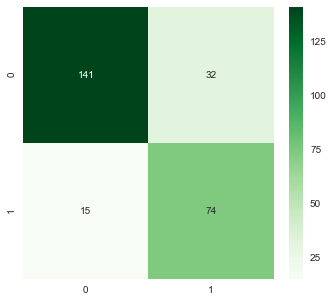

In [209]:
# Model Evluation : Confusion Metrics
#Confusion Matrix
plt.figure(figsize=(5,5))
print('CONFUSION MATRIX')
cfmodelLR=metrics.confusion_matrix(predictionLR,Y_test)
sns.heatmap(cfmodelLR , annot = True , cmap = "Greens" , fmt = 'd' )
plt.show()

(0.0, 1.0)

(0.0, 1.05)

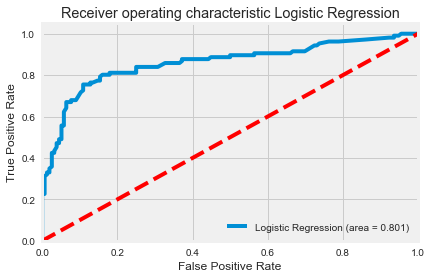

In [210]:
from sklearn import metrics
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ModelLR_roc_auc = roc_auc_score(Y_test, modelLR.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, modelLR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % ModelLR_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [211]:
predictionLR_Train=modelLR.predict(X_train)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predictionLR_Train,Y_train))
# Model Evluation : Accuracy
print(metrics.classification_report(predictionLR_Train,Y_train))

The accuracy of the Logistic Regression is 0.7879656160458453
             precision    recall  f1-score   support

          0       0.86      0.81      0.83       687
          1       0.68      0.74      0.71       360

avg / total       0.79      0.79      0.79      1047



LR Model Summary :


Accuracy Higher on Test against that on Train indicating "No Overfitting"

In [212]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis(),XGBClassifier()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis',
            'XGBoost']

accuracy = []
precision = []
recall = []
roc_auc = []
for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    accuracy.append(accuracy_score(pred , Y_test))
    precision.append(precision_score(pred , Y_test))
    recall.append(recall_score(pred , Y_test))
    roc_auc.append(roc_auc_score(pred , Y_test))
     
compare = pd.DataFrame({'Algorithm' : model_names , 'AUC' : roc_auc, 'Accuracy' : accuracy , 'Precision' : precision , 'Recall' : recall})
compare

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

GaussianNB(priors=None)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

,AUC,Accuracy,Algorithm,Precision,Recall
0,0.823245,0.820611,LogisticRegression,0.698113,0.831461
1,0.836515,0.835878,LinearSVM,0.735849,0.838710
2,0.826555,0.812977,rbfSVM,0.641509,0.860759
3,0.767665,0.759542,KNearestNeighbors,0.556604,0.786667
4,0.790837,0.790076,RandomForestClassifier,0.650943,0.793103
5,0.801363,0.797710,DecisionTree,0.650943,0.811765
6,0.802116,0.782443,GradientBoostingClassifier,0.566038,0.845070
7,0.763358,0.767176,GaussianNB,0.801887,0.680000
8,0.831560,0.832061,LinearDiscriminantAnalysis,0.735849,0.829787
9,0.706232,0.702290,QuadraticDiscriminantAnalysis,0.773585,0.602941


In [214]:
result_df = compare.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Algorithm')
result_df.head(15)

,AUC,Accuracy,Precision,Recall
Algorithm,,,,
LinearSVM,0.836515,0.835878,0.735849,0.838710
LinearDiscriminantAnalysis,0.831560,0.832061,0.735849,0.829787
LogisticRegression,0.823245,0.820611,0.698113,0.831461
rbfSVM,0.826555,0.812977,0.641509,0.860759
XGBoost,0.842480,0.809160,0.584906,0.911765
DecisionTree,0.801363,0.797710,0.650943,0.811765
RandomForestClassifier,0.790837,0.790076,0.650943,0.793103
GradientBoostingClassifier,0.802116,0.782443,0.566038,0.845070
GaussianNB,0.763358,0.767176,0.801887,0.680000
